# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [19]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

In [21]:
import scipy.stats as sps
coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf

Для вычисления равномерного распределения мы создаем массив из случайно сгенерированных нулей и единиц, делим его на количество требуемых чисел, переводим из двоичной системы счисления в десятичную и приводим к требуемой размерности.

In [22]:
def uniform(size=1, precision=30):  # получение равномерного распределения
    count_num = np.prod(size)
    lis = coin(precision * count_num).reshape(np.array(count_num), precision)
    help_arr = list(map(lambda x: 1 / (2 ** x), np.arange(1, precision + 1)))
    return (lis * help_arr).sum(axis=1).reshape(size)

На графике будет изображена гистограмма плотности наших величин (зеленый), сами величины (синий) и теоретическое значение плотности (красный).

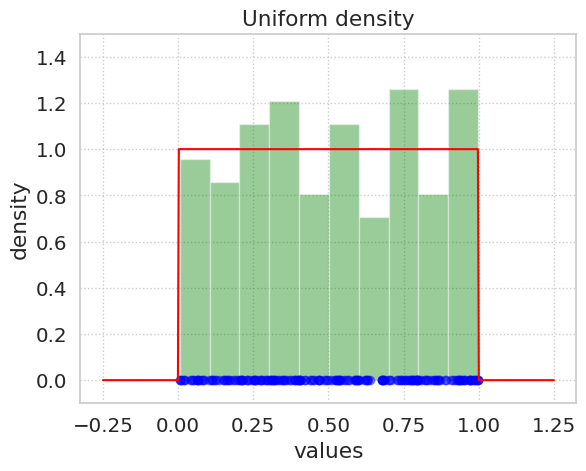

In [23]:
def plot_uniform_density(size=200):  # построение графика для равномерного распределения
    plt.figure()
    data = uniform(size)
    grid = np.linspace(-0.25, 1.25, 500)  # равномерная сетка от -0.25 до 1.25 из 500 точек
    plt.hist(data, bins=10, density=True, alpha=0.4, color='green')
    plt.scatter(x=data, y=np.zeros(size), alpha=0.4, color='blue')
    plt.plot(grid, uniform_pdf(grid), color='red')
    plt.grid(ls=':')
    plt.ylim((-0.1, 1.5))
    plt.title('Uniform density')
    plt.xlabel('values')
    plt.ylabel('density')
    return plt.gcf()

plot_uniform_density()
plt.show()

Из графика можно заключить, что 200 величин недостаточно, чтобы с большой точностью говорить о значениях плотности распределения.

Далее мы демонстрируем значения точек при разной заданной точности 

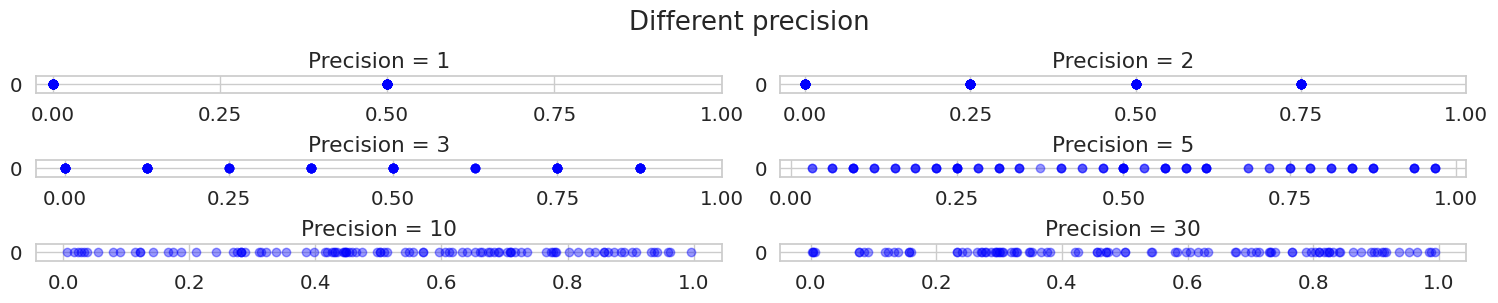

In [24]:
def plot_uniform_different_precision(size=100):  # график значений точек для разной точности
    plt.figure(figsize=(15, 3))
    plt.suptitle('Different precision')
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        plt.subplot(3, 2, i + 1)
        plt.title('Precision = ' + str(precision))
        plt.scatter(uniform(size, precision), np.zeros(size), alpha=0.4, color='blue')

        plt.yticks([0])
        if i < 4:
            plt.xticks([0.0, 0.25, 0.5, 0.75, 1.0])
    return plt.gcf()

plot_uniform_different_precision()
plt.tight_layout(pad=0.5)
plt.show()

Визуально заметно, что при увеличении точности распределение начинает стремиться к равномерному.

Построим нормальное распределение при помощи преобразования Бокса-Мюллера, используя наше равномерное распределение.
Берем $$ \zeta = \cos(2\pi a)\sqrt{-2 \ln{b}} $$ где $a$ и $b$ сгенерированы фунцкией uniform. Далее домножаем на $\sigma$ и прибавляем $\mu$.

In [25]:
def normal(size=1, loc=0, scale=1, precision=30):  # получение нормального распределения
    first_un = uniform(size, precision)
    second_un = uniform(size, precision)

    first_un = np.cos(first_un * 2 * np.pi)
    second_un = np.sqrt((-2) * np.log(second_un))

    return first_un * second_un * scale + loc

Строим такие же графики как и для равномерного распределения:

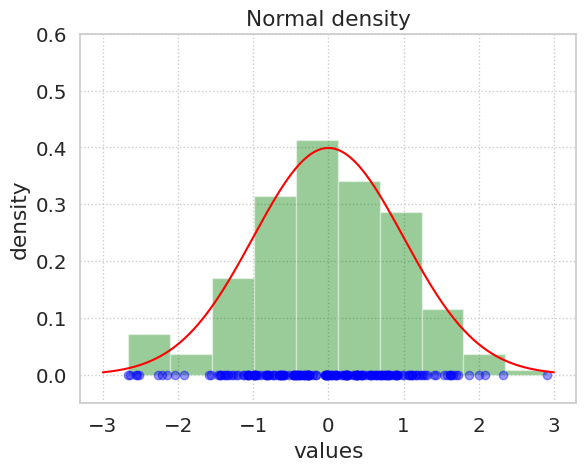

In [26]:
def plot_normal_density(size=200):  # построение графика
    plt.figure()
    data = normal(size, 0, 1)
    grid = np.linspace(-3., 3., 500)  # равномерная сетка от -0.25 до 1.25 из 500 точек
    plt.hist(data, bins=10, density=True, alpha=0.4, color='green')
    plt.scatter(x=data, y=np.zeros(size), alpha=0.4, color='blue')
    plt.plot(grid, norm_pdf(grid), color='red')
    plt.grid(ls=':')
    plt.title('Normal density')
    plt.xlabel('values')
    plt.ylabel('density')
    plt.ylim((-0.05, 0.6))
    return plt.gcf()

plot_normal_density()
plt.show()

Для экспоненциального распределения используем формулу
$$- \frac{\ln(1 - a)}{\lambda}$$ где $a$ берем из равномерного распределения. Такой способ называется методом обратного преобразования.

In [27]:
def expon(size=1, lambd=1, precision=30):  # получение экспоненциального распределения
    return (-1) * np.log(1 - uniform(size, precision)) / lambd

Строим графики аналогично предыдущим пунктам

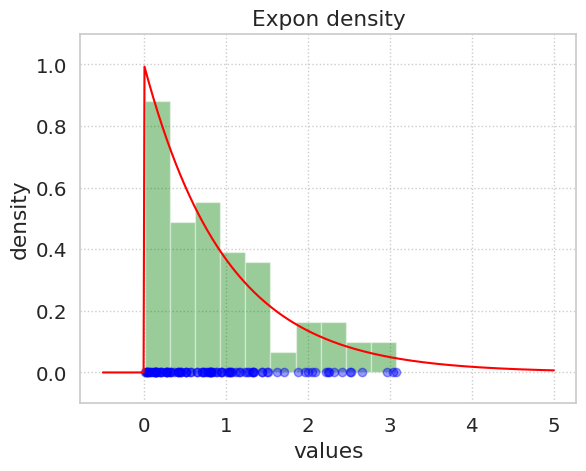

In [28]:
def plot_expon_density(size=100):  # построение графика
    plt.figure()
    data = expon(size, 1)
    grid = np.linspace(-0.5, 5, 500)  # равномерная сетка от -0.25 до 1.25 из 500 точек
    plt.hist(data, bins=10, density=True, alpha=0.4, color='green')
    plt.scatter(x=data, y=np.zeros(size), alpha=0.4, color='blue')
    plt.plot(grid, expon_pdf(grid), color='red')
    plt.grid(ls=':')
    plt.ylim((-0.1, 1.1))
    plt.xlabel('values')
    plt.ylabel('density')
    plt.title('Expon density')
    return plt.gcf()

plot_expon_density()
plt.show()

**Выводы:**

На графиках мы получили картину, соответствующую ожидаемой плотности вероятности для разных распределений.
Это может служить подтверждением разумности выбранных методов генерации чисел и экспериментальной проверкой
двух преобразований: Бокса-Мюллера и обратного. Не смотря на соответствие графиков ожиданиям присутствуют
некоторые неточности, что может быть устранено при увеличении количества значений в выборке.

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

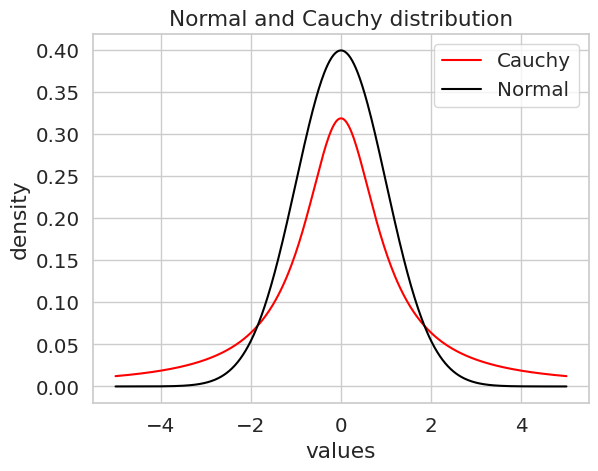

In [29]:
plt.figure()
grid1 = np.linspace(-5, 5, 500)
grid2 = np.linspace(-5, 5, 500)
plt.plot(grid1, sps.cauchy.pdf(grid1), label='Cauchy', color='red')
plt.plot(grid2, sps.norm.pdf(grid2), label='Normal', color='black')
plt.title("Normal and Cauchy distribution")
plt.xlabel('values')
plt.ylabel('density')
plt.legend()

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

В данном пункте мы применяем эксперимент для распределения Коши

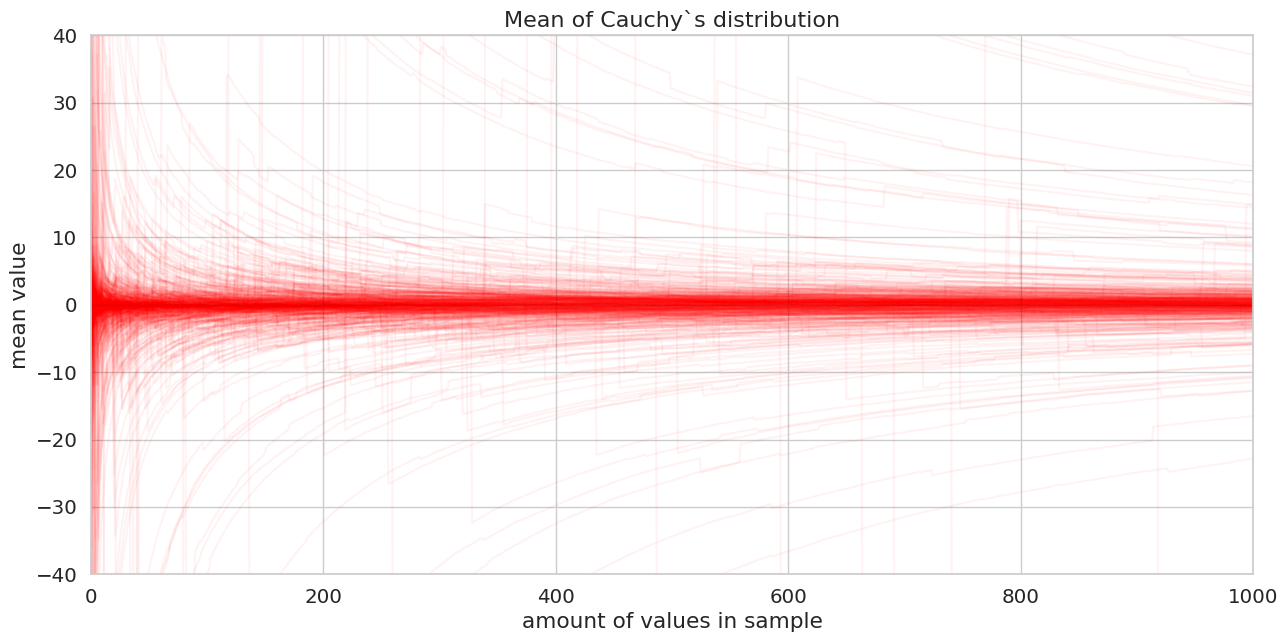

In [30]:
size = 1000
samples_count = 500
    
# Генерация выборки и вычисление средних
samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)
# График
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='red', alpha=0.05)
plt.title('Mean of Cauchy`s distribution', fontsize=16)
plt.xlabel('amount of values in sample')
plt.ylabel('mean value')
plt.xlim((0, size))
plt.ylim(-40, 40)
plt.show()

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

Чтобы выявить зависимость медианы от количества значений в выборке будем идти циклом по количеству значений и
считать медиану для каждого, затем на каждом шаге добавляем результат к уже имеющимя медианам. Результирующая
таблица будет соответствовать требованиям задачи.

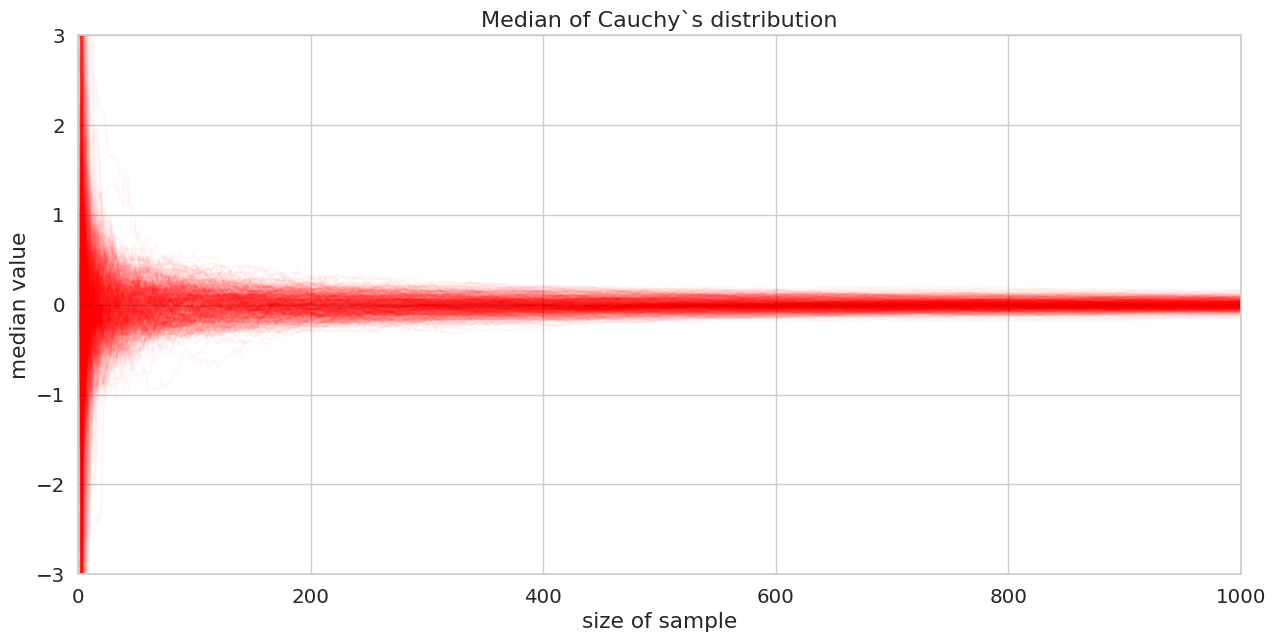

In [31]:
size = 1000
samples_count = 500
    
# Генерация выборки и вычисление средних
samples = sps.cauchy.rvs(size=(samples_count, size))
med_means = samples[:, 0].reshape(samples_count, 1)
for i in range(size - 1):
    med_means = np.hstack([med_means, np.median(samples[:, :i + 1], axis=1).reshape(samples_count, 1)])
# График
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, med_means[i], color='red', alpha=0.03)
plt.title('Median of Cauchy`s distribution', fontsize=16)
plt.xlabel('size of sample')
plt.ylabel('median value')
plt.xlim((0, size))
plt.ylim(-3, 3)
plt.show()

**Вывод:**

Из первого графика видно, что закон больших чисел плохо применим к распределеиню Коши, поскольку медленная сходимость среднего значения при увеличении числа значений в выборке не соответствует одной из формулировок. При этом значение медианы довольно хорошо удовлетворяет этому закону, что можно легко увидеть на втором графике. Таким образом мы подтвердили сказанное в начале задачи и узнали, что на значение медианы это свойство не распространяется.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

Для получения $F(n)$ мы считаем значения модуля разности математического ожидания (в данном случае 0.5) и среднего в выборках при помощи функции cumsum, затем суммируем все имеющиеся выборки и делим результат на их количество. Также строим логарифмированный график для большей наглядности.

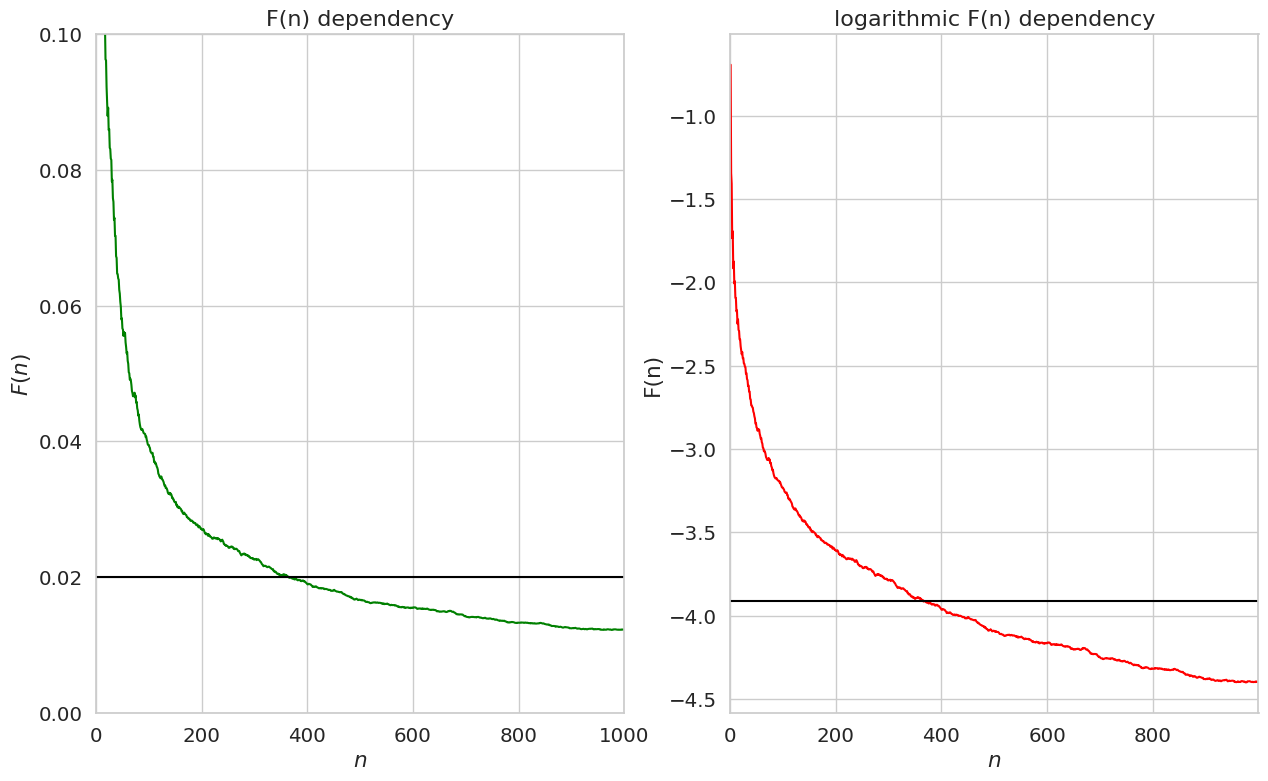

In [32]:
size = 1000
samples_count = 500
    
# Генерация выборки и вычисление средних
samples = sps.bernoulli(p=0.5).rvs(size=(samples_count, size))
cum_means = np.absolute(samples.cumsum(axis=1) / (np.arange(size) + 1) - 0.5)
cum_means = np.sum(cum_means, axis=0) / samples_count
# Графики
plt.figure(figsize=(15, 30))

plt.subplot(3, 2, 1)
plt.plot(np.arange(size) + 1, cum_means, color='green', label='$n$')
plt.plot(np.arange(size) + 1, np.full(shape=(size), fill_value=0.02), color='black')
plt.xlim((0, size))
plt.ylim(0, 0.1)
plt.title('F(n) dependency', fontsize=16)
plt.xlabel('$n$')
plt.ylabel('$F(n)$')

plt.subplot(3, 2, 2)
plt.plot(np.arange(size) + 1, np.log(cum_means), color='red', label='$-ln(n)$')
plt.plot(np.arange(size) + 1, np.log(np.full(shape=(size), fill_value=0.02)), color='black')
plt.xticks(np.arange(0, size, 200))
plt.xlim((0, size))
plt.title('logarithmic F(n) dependency', fontsize=16)
plt.xlabel('$n$')
plt.ylabel('F(n)')

plt.show()

Можно заметить, что нужная точность достигается примерно при 400 элементах выборки.

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

Для каждой величины $a$ получаем число элементов, начиная с которого результат можно считать точным. Создаем из
этих значений список, при помощи которого можно построить график, поскольку мы знаем какому $a$ соответствует
каждое число.

(0.05, 0.95)

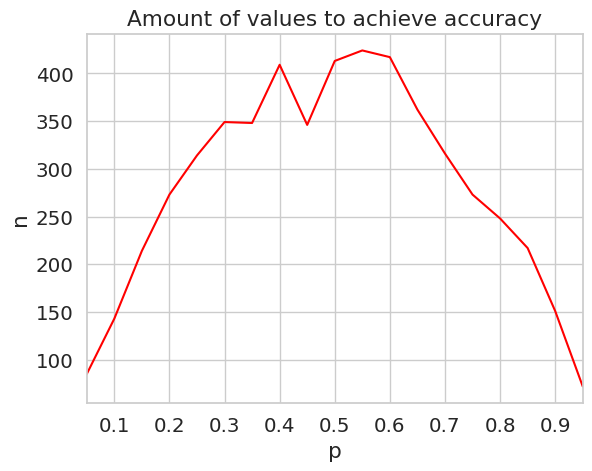

In [33]:
arr_0 = list()

for a in np.linspace(0.05, 0.95, 19):
    samples = sps.bernoulli(p=a).rvs(size=(samples_count, size))
    cum_means = np.absolute(samples.cumsum(axis=1) / (np.arange(size) + 1) - a)
    cum_means = np.sum(cum_means, axis=0) / samples_count
    arr = np.arange(size)
    arr_0.append(np.where((cum_means <= 0.02), 0, 1).sum(axis=0))

arr_0 = np.array(arr_0)

plt.figure()
plt.plot(np.linspace(0.05, 0.95, 19), arr_0, color='red')
plt.title('Amount of values to achieve accuracy')
plt.xlabel('p')
plt.ylabel('n')
plt.xticks(np.linspace(0.1, 0.9, 9))
plt.xlim((0.05, 0.95))

**Выводы:**

Можно заключить, что полученный график симметричен относительно точки 0.5, причем в ней достигается максимум
нужного количества чисел. В частности это означает, что значение 400 элементов, которое мы нашли в прошлом пункте можно
считать количеством элементов, достаточным для точного результата при любом значении аргумента функции Bern.